In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [29]:
# Load the dataset
df = pd.read_csv('Data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [30]:
# Step 1: Correlation Analysis
correlations = df.corr()
print("Correlation Coefficients:\n", correlations['Gold_Price'])

Correlation Coefficients:
 Gold_Price    1.000000
USD_Price    -0.401637
GDP           0.815445
Oil           0.783434
Name: Gold_Price, dtype: float64


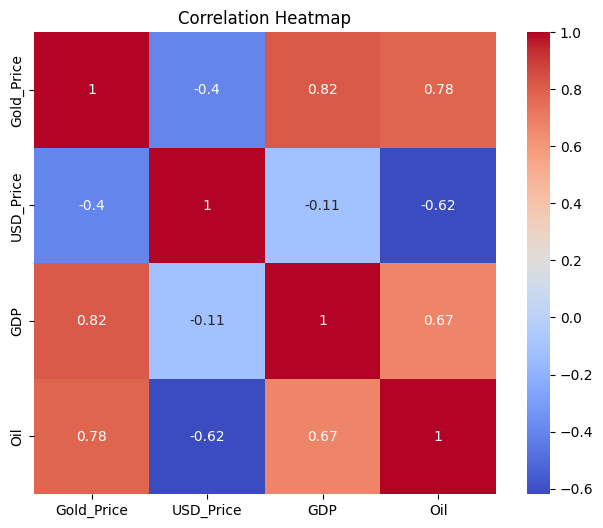

In [31]:
# Plotting correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [32]:
# Step 2: Stationarity Check
# Function to apply the Augmented Dickey-Fuller test
def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    print(f'Augmented Dickey-Fuller Test for {title}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print("Critical Values:")
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    print('')

In [33]:
# Apply ADF test on each variable
for column in df.columns:
    adf_test(df[column], title=column)

Augmented Dickey-Fuller Test for Gold_Price
ADF Statistic: 0.07993979388284092
p-value: 0.9646645001705061
Critical Values:
	1%: -3.4502615951739393
	5%: -2.8703117734117742
	10%: -2.5714433728242714

Augmented Dickey-Fuller Test for USD_Price
ADF Statistic: -1.8986063427357465
p-value: 0.33271701486658456
Critical Values:
	1%: -3.4496162602188187
	5%: -2.870028369720798
	10%: -2.5712922615505627

Augmented Dickey-Fuller Test for GDP
ADF Statistic: -1.4518537756510457
p-value: 0.5571800950853137
Critical Values:
	1%: -3.449846029628477
	5%: -2.870129281376164
	10%: -2.5713460670144603

Augmented Dickey-Fuller Test for Oil
ADF Statistic: -2.0805798105886613
p-value: 0.2523949124926398
Critical Values:
	1%: -3.449673193310592
	5%: -2.8700533746644323
	10%: -2.5713055939491403



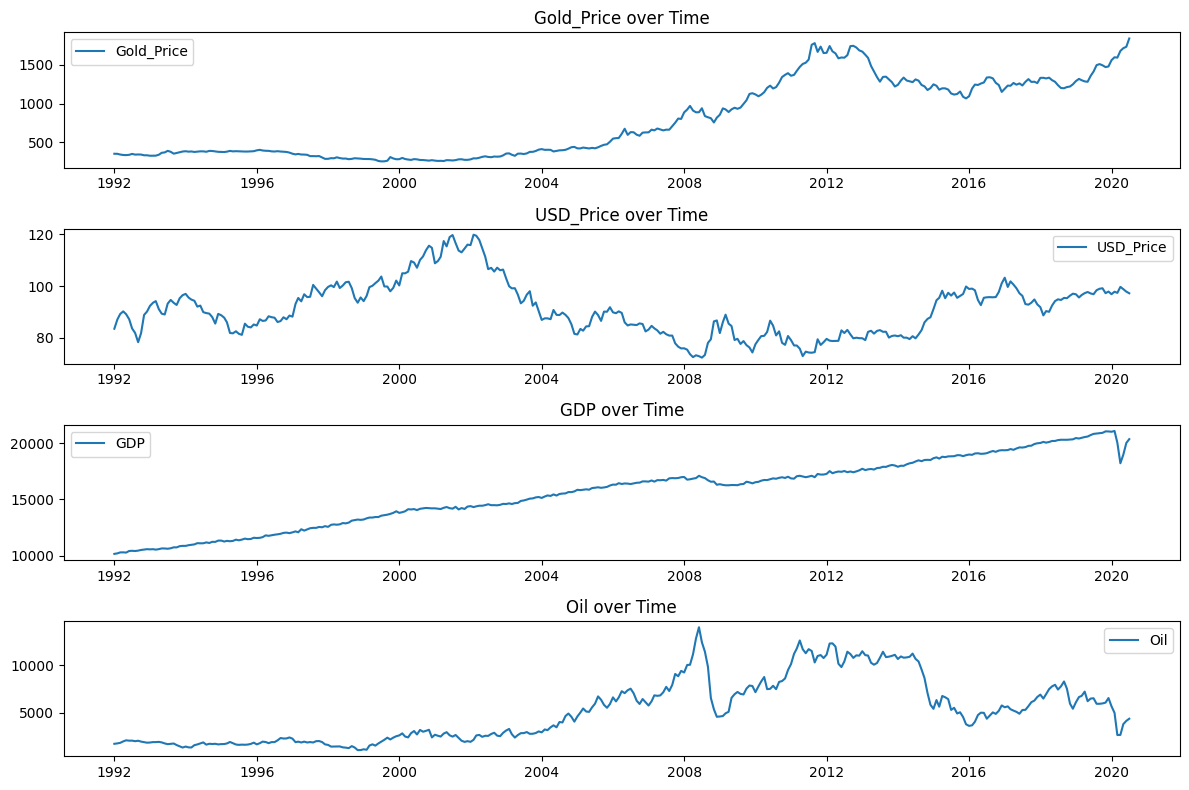

In [34]:
# Step 3: Data Visualization
# Plot the original series for each variable
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns):
    plt.subplot(len(df.columns), 1, i+1)
    plt.plot(df.index, df[col], label=col)
    plt.title(f'{col} over Time')
    plt.legend()
plt.tight_layout()
plt.show()